1. satisfaction_level​- Уровень удовлетворенности работой
2. Last_evaluation ​ - Время с момента последней оценки в годах
3. number_projects​- Количество проектов, выполненных за время работы
4. average_monthly_hours​- Среднее количество часов на рабочем месте в месяц
5. time_spend_company​- Стаж работы в компании в годах
6. work_accident​- Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left​- уволился ли сотрудник
8. promotion_last_5years​- повышался ли сотрудник за последние пять лет
9. department ​ - отдел в котором работает сотрудник
10. salary​- относительный уровень зарплаты

In [6]:
# 1 Загрузите файл HR.csv в pandas dataframe
import pandas as pd
# файл поместил в корневую папку с файлом Jupyter Notebook
df = pd.read_csv('HR.csv')
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# 2 Рассчитайте основные статистики для переменных
# (среднее,медиана,мода,мин/макс,сред.отклонение).
df.describe()  # используем метод describe() на датасет, так данные с типами int и float будут использоваться для рассчета основных статистик: среднее,медиана,мин/макс,сред.отклонение


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [59]:
# посчитаем моду
df.mode()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Самые скоррелированные -[number_project и average_montly_hours] и [number_project и last_evaluation]
                      number_project  average_montly_hours
number_project              1.000000              0.417211
average_montly_hours        0.417211              1.000000
                 number_project  last_evaluation
number_project         1.000000         0.349333
last_evaluation        0.349333         1.000000
Наименее скоррелированные -[Work_accident и average_montly_hours] и [time_spend_company и satisfaction_level]
                      Work_accident  average_montly_hours
Work_accident              1.000000             -0.010143
average_montly_hours      -0.010143              1.000000
                    time_spend_company  satisfaction_level
time_spend_company            1.000000           -0.100866
satisfaction_level           -0.100866            1.000000


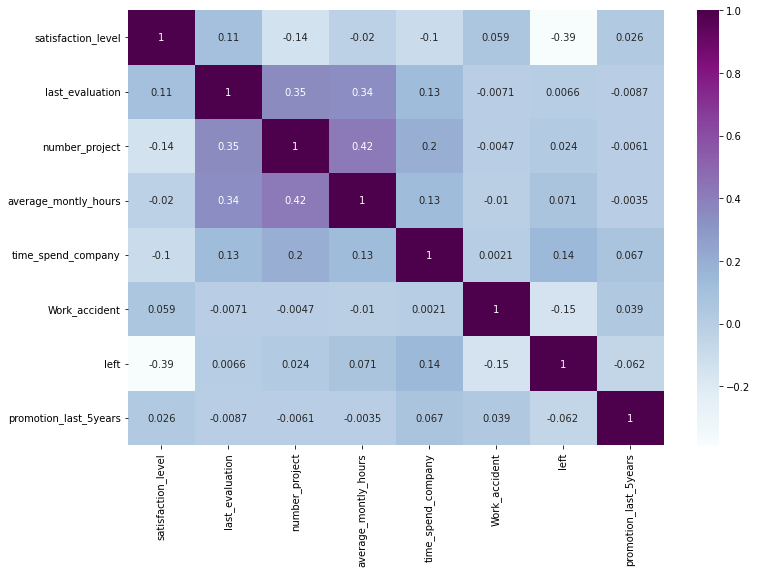

In [63]:
# 3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные
# переменные.
import matplotlib.pyplot as plt
import seaborn as sns
df_corr = df.corr()
plt.figure(figsize=(12, 8))

# plot the heatmap
sns.heatmap(df_corr, cmap="BuPu", annot=True)
print(
    'Самые скоррелированные -[number_project и average_montly_hours] и [number_project и last_evaluation]')
print(df[['number_project', 'average_montly_hours']].corr())
print(df[['number_project', 'last_evaluation']].corr())
print(
    'Наименее скоррелированные -[Work_accident и average_montly_hours] и [time_spend_company и satisfaction_level]')
print(df[['Work_accident', 'average_montly_hours']].corr())
print(df[['time_spend_company', 'satisfaction_level']].corr())


In [54]:
# 4 Рассчитайте сколько сотрудников работает в каждом департаменте.
df.groupby('department').salary.count()


department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64

In [64]:
# 5 Показать распределение сотрудников по зарплатам.
df.groupby('salary').department.count()


salary
high      1237
low       7316
medium    6446
Name: department, dtype: int64

In [96]:
# 6 Показать распределение сотрудников по зарплатам в каждом  департаменте
# по отдельности
df.groupby(['department', 'salary'])\
    .agg({'satisfaction_level': 'count'})\
    .rename(columns={"satisfaction_level": "qty_people"})


qty_people
department  salary            
IT          high            83
            low            609
            medium         535
RandD       high            51
            low            364
            medium         372
accounting  high            74
            low            358
            medium         335
hr          high            45
            low            335
            medium         359
management  high           225
            low            180
            medium         225
marketing   high            80
            low            402
            medium         376
product_mng high            68
            low            451
            medium         383
sales       high           269
            low           2099
            medium        1772
support     high           141
            low           1146
            medium         942
technical   high           201
            low           1372
            medium        1147

Построим графики распределений рабочего времени для низкого и высокого оклада


<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

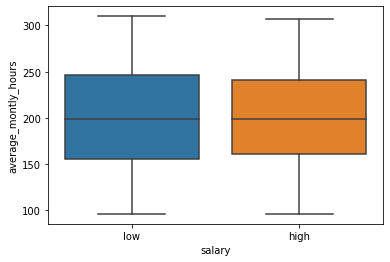

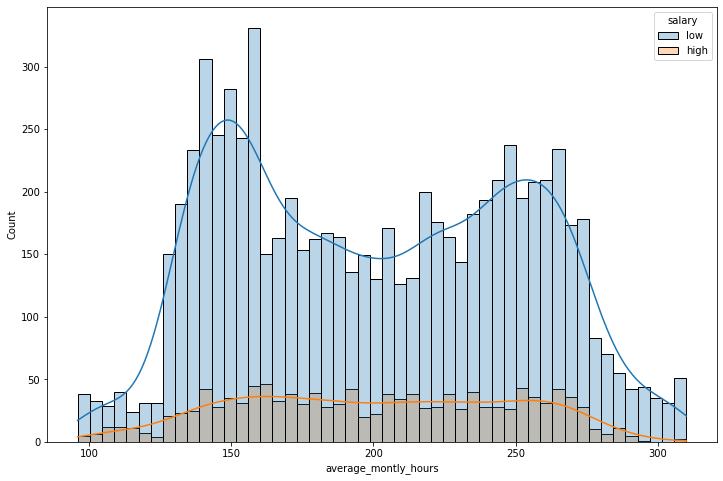

In [145]:
# 7 Проверить гипотезу, что сотрудники с высоким окладом
# проводят на работе больше времени, чем сотрудники с низким окладом
df_h_l_salary = df.query('salary=="low" or salary=="high"')
print('Построим графики распределений рабочего времени для низкого и высокого оклада')

sns.boxplot(
    y="average_montly_hours",
    x='salary',
    data=df_h_l_salary
)

plt.figure(figsize=(12, 8))
sns.histplot(
    data=df_h_l_salary,
    x="average_montly_hours",
    label="Sepal Length",
    hue='salary',
    alpha=0.3,
    bins=50,
    kde=True)


In [122]:
# У нас наблюдается бимодальное распределение при низком уровне зарплат, при высоком уровне зарплат количество часов более нормально, но также не является нормальным.
# Для проверки используем непараметрический тест Крускала-Уоллиса

from scipy import stats
df_h_salary = df.query('salary=="high"')
df_l_salary = df.query('salary=="low"')
# Тест Крускала-Уоллиса содержит нулевую и альтернативные гипотезы:

#     Нулевая гипотеза (H0): медиана одинакова для всех групп данных.
#     Альтернативная гипотеза: (H1): медиана не одинакова для всех групп данных

stat, p = stats.kruskal(
    df_h_salary['average_montly_hours'], df_l_salary['average_montly_hours'])
print(f'P равно = {p}')
print('Поскольку значение p больше 0,05 , мы принимаем нулевую гипотезу о том, что среднее значение одинаково в группах')
print('Таким образом, в среднем все работают одинаково')


P равно = 0.8241282261403291
Поскольку значение p больше 0,05 , мы принимаем нулевую гипотезу о том среднее значение одинаково в группах
Таким образом в среднем все работают одинаково


In [154]:
# 8 Рассчитать следующие показатели среди уволившихся и не
 # уволившихся сотрудников (по отдельности):
df_left= df.query('left==1')
df_stay= df.query('left==0')

# ● Доля сотрудников с повышением за последние 5 лет
prmtd_l_5y_left = len(df_left.query('promotion_last_5years ==1')) / len(df_left)

print(
    f'Доля сотрудников с повышением за последние 5 лет среди покинувших компанию {prmtd_l_5y_left *100:.3f}%')

prmtd_l_5y_stay = len(df_stay.query('promotion_last_5years ==1')) / len(df_stay)

print(
    f'Доля сотрудников с повышением за последние 5 лет среди оставшихся в компании {prmtd_l_5y_stay*100:.3f}%')

# ● Средняя степень удовлетворенности

print(
    f'Для сотрудников, покинувших компанию, средняя степень удовлетворенности: {df_left.satisfaction_level.mean():.3f}')

print(
    f'Для сотрудников, не покинувших компанию, средняя степень удовлетворенности:{df_stay.satisfaction_level.mean():.3f}')

# ● Среднее количество проектов
print(
    f'Для сотрудников, покинувших компанию, среднее кол-во проектов: {df_left.number_project.mean():.3f}')

print(
    f'Для сотрудников, не покинувших компанию, среднее кол-во проектов:{df_stay.number_project.mean():.3f}')

Доля сотрудников с повышением за последние 5 лет среди покинувших компанию 0.532%
Доля сотрудников с повышением за последние 5 лет среди оставшихся в компании 2.625%
Для сотрудников, покинувших компанию, средняя степень удовлетворенности: 0.440
Для сотрудников, не покинувших компанию, средняя степень удовлетворенности:0.667
Для сотрудников, покинувших компанию, среднее кол-во проектов: 3.856
Для сотрудников, не покинувших компанию, среднее кол-во проектов:3.787


In [177]:
# 9 Разделить данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился ли
# сотрудник на основе имеющихся факторов (кроме department и
# salary)
# Оценить качество модели на тестовой выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['left','department','salary']), df['left'] , test_size=0.2)


In [184]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit_transform(X_train,y_train)

array([[-0.98532038],
       [ 0.48899548],
       [ 2.08788942],
       ...,
       [ 0.14456548],
       [ 0.97776693],
       [ 2.20527234]])

              precision    recall  f1-score   support

        Stay       0.80      0.92      0.86      2313
       Leave       0.48      0.24      0.32       687

    accuracy                           0.77      3000
   macro avg       0.64      0.58      0.59      3000
weighted avg       0.73      0.77      0.73      3000



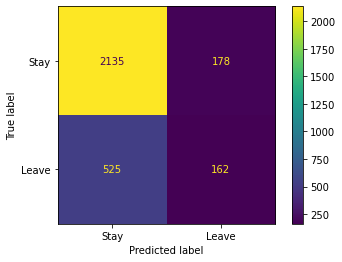

In [197]:
y_pred= lda.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, 
                                y_pred=y_pred, 
                                target_names=["Stay", "Leave"]))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                      display_labels=["Stay", "Leave"])

Взвешенные значения precision:  0.73; recall: 0.77.
Наша модель лучше предсказывает людей, которые останутся. f1 score для Stay:  0.86, для Leave:0.32

In [ ]:
# 10 Загрузить jupyter notebook с решение на github и прислать ссылку
# done